In [1]:
# Pyber Ride Sharing Analysis

In [2]:
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np


In [3]:
# File to Load: Import City and Ride data csv files
city_data = "city_data.csv"
ride_data = "ride_data.csv"

In [4]:
# Read the City data file using pandas library
city_data_df = pd.read_csv(city_data)
city_df = city_data_df
city_df.head()

,city,driver_count,type
0,Richardfort,38,Urban
1,Williamsstad,59,Urban
2,Port Angela,67,Urban
3,Rodneyfort,34,Urban
4,West Robert,39,Urban


In [5]:
# Read the Ride data file using pandas library
ride_data_df = pd.read_csv(ride_data)
ride_df = ride_data_df
ride_df.head()

,city,date,fare,ride_id
0,Lake Jonathanshire,2018-01-14 10:14:22,13.83,5739410935873
1,South Michelleport,2018-03-04 18:24:09,30.24,2343912425577
2,Port Samanthamouth,2018-02-24 04:29:00,33.44,2005065760003
3,Rodneyfort,2018-02-10 23:22:03,23.44,5149245426178
4,South Jack,2018-03-06 04:28:35,34.58,3908451377344


In [6]:
# Combine the data into a single dataset
# Display the data table for preview
merge_df = pd.merge(ride_df, city_df, on ="city", how="left")
merge_df.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2018-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2018-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2018-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2018-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2018-03-06 04:28:35,34.58,3908451377344,46,Urban


In [7]:
# Average Fare ($) per City
average_fare = merge_df.groupby("city")["fare"].mean()
average_fare

city
Amandaburgh             24.641667
Barajasview             25.332273
Barronchester           36.422500
Bethanyland             32.956111
Bradshawfurt            40.064000
Brandonfort             35.437368
Carriemouth             28.314444
Christopherfurt         24.501852
Colemanland             30.894545
Davidfurt               31.995882
Deanville               25.842632
East Aaronbury          25.661111
East Danielview         31.560588
East Kaylahaven         23.757931
East Kentstad           29.823077
East Marymouth          30.835185
Erikaland               24.906667
Garzaport               24.123333
Grahamburgh             25.221200
Grayville               27.763333
Harringtonfort          33.470000
Huntermouth             28.993750
Hurleymouth             25.891429
Jerryton                25.649200
Jessicaport             36.013333
Johnton                 26.785714
Joneschester            22.289600
Josephside              32.858148
Justinberg              23.694333
Karenberg

In [8]:
# Total number of Rides per City
total_rides = merge_df.groupby("city")["ride_id"].count()
total_rides

city
Amandaburgh             18
Barajasview             22
Barronchester           16
Bethanyland             18
Bradshawfurt            10
Brandonfort             19
Carriemouth             27
Christopherfurt         27
Colemanland             22
Davidfurt               17
Deanville               19
East Aaronbury           9
East Danielview         17
East Kaylahaven         29
East Kentstad           13
East Marymouth          27
Erikaland               12
Garzaport                3
Grahamburgh             25
Grayville               15
Harringtonfort           6
Huntermouth             24
Hurleymouth             28
Jerryton                25
Jessicaport              6
Johnton                 21
Joneschester            25
Josephside              27
Justinberg              30
Karenberg               17
                        ..
South Evanton           31
South Jack              19
South Jennifer           7
South Karenland         38
South Latoya            19
South Marychester      

In [9]:
# Total number of Drivers per City
total_drivers = merge_df.groupby("city")["driver_count"].mean()
total_drivers

city
Amandaburgh             12
Barajasview             26
Barronchester           11
Bethanyland             22
Bradshawfurt             7
Brandonfort             10
Carriemouth             52
Christopherfurt         41
Colemanland             23
Davidfurt               23
Deanville               49
East Aaronbury           7
East Danielview         22
East Kaylahaven         65
East Kentstad           20
East Marymouth           5
Erikaland               37
Garzaport                7
Grahamburgh             61
Grayville                2
Harringtonfort           4
Huntermouth             37
Hurleymouth             36
Jerryton                64
Jessicaport              1
Johnton                 27
Joneschester            39
Josephside              25
Justinberg              39
Karenberg               22
                        ..
South Evanton           11
South Jack              46
South Jennifer           7
South Karenland          4
South Latoya            10
South Marychester      

In [10]:
# City Type
city_type = city_df.set_index ("city")["type"]
city_type.value_counts()

Urban       66
Suburban    36
Rural       18
Name: type, dtype: int64

## Bubble Plot of Ride Sharing Data

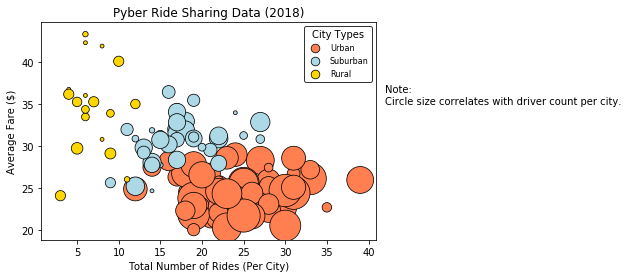

In [11]:
# Obtain the x and y coordinates for each of the three city types
merge_df = pd.merge(city_df, ride_df, on ="city", how="outer")
urban = merge_df[(merge_df["type"] == "Urban")]
suburban = merge_df[(merge_df["type"] == "Suburban")]
rural = merge_df[(merge_df["type"] == "Rural")]

urbanavg = urban.groupby("city")["fare"].mean()
suburbanavg = suburban.groupby("city")["fare"].mean()
ruralavg = rural.groupby("city")["fare"].mean()

urbanrides = urban.groupby("city")["ride_id"].count()
suburbanrides = suburban.groupby("city")["ride_id"].count()
ruralrides = rural.groupby("city")["ride_id"].count()

urbandrivers = urban.groupby("city")["driver_count"].mean()
suburbandrivers = suburban.groupby("city")["driver_count"].mean()
ruraldrivers = rural.groupby("city")["driver_count"].mean()

# Build the scatter plots for each city types
urban_plot=plt.scatter(x=urbanrides, y=urbanavg, s=15*urbandrivers, c='coral' , linewidths=.75, edgecolor='black', marker ="o", label = "Urban")
suburban_plot=plt.scatter(x=suburbanrides, y=suburbanavg, s=15*suburbandrivers, c="lightblue", linewidths=.75, edgecolor='black', marker ="o", label ="Suburban")
rural_plot=plt.scatter(x=ruralrides, y=ruralavg, s=15*ruraldrivers, c="gold" , linewidths=.75, edgecolor='black',marker ="o", label = "Rural")

# Incorporate the other graph properties
plt.title("Pyber Ride Sharing Data (2018)")
plt.xlabel("Total Number of Rides (Per City)")
plt.ylabel("Average Fare ($)")

# Create a legend
lgnd = plt.legend(fontsize = 8, mode = "Expanded", title = "City Types", frameon = True, edgecolor = "black", loc="best") 

lgnd.legendHandles[0]._sizes = [75]
lgnd.legendHandles[1]._sizes = [75]
lgnd.legendHandles[2]._sizes = [75]

# Incorporate a text label regarding circle size
plt.text(42,35,"Note: \nCircle size correlates with driver count per city.", fontsize = 10)

# Save Figure
plt.savefig("Pyber Ride Sharing Data.png", bbox_inches="tight")


## Total Fares by City Type

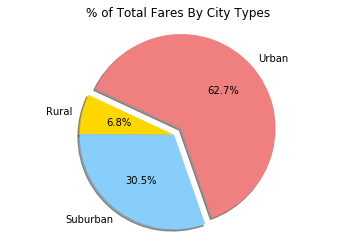

In [12]:
# Calculate Type Percents
total_fare = merge_df.groupby(['type'])['fare'].sum()

# Build Pie Chart
labels = ["Rural","Suburban","Urban" ]
colors = ["gold","lightskyblue","lightcoral"]
explode = (0, 0, 0.1)
plt.title("% of Total Fares By City Types")
plt.pie(total_fare, explode=explode, labels=labels, colors=colors, autopct="%1.1f%%",shadow=True, startangle=155)
plt.axis("equal")

# Save Figure
plt.savefig("Total Fares By City Types.png")

# Show Figure
plt.show()

## Total Rides by City Type

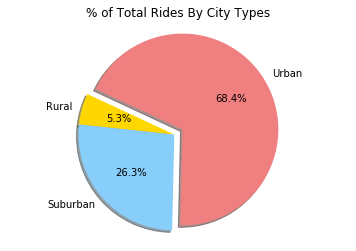

In [13]:
# Calculate Ride Percents
total_rides = merge_df.groupby(['type'])['ride_id'].count()

# Build Pie Chart
labels = ["Rural","Suburban","Urban" ]
colors = ["gold","lightskyblue","lightcoral"]
explode = (0, 0, 0.1)
plt.title("% of Total Rides By City Types")
plt.pie(total_rides, explode=explode, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=155)
plt.axis("equal")

# Save Figure
plt.savefig("Total Rides By City Types.png")

# Show Figure
plt.show()

## Total Drivers by City Type

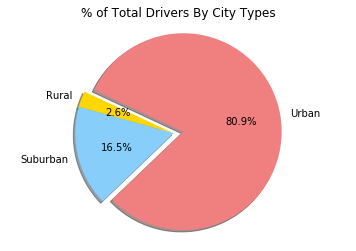

In [14]:
# Calculate Percentageof Total Driver
total_drivers = city_df.groupby(['type'])['driver_count'].sum()

# Build Pie Charts
labels = ["Rural","Suburban","Urban"]
colors = ["gold","lightskyblue","lightcoral"]
explode = (0, 0, 0.1)
plt.title("% of Total Drivers By City Types")
plt.pie(total_drivers, explode=explode, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=155)
plt.axis("equal")

# Save Figure
plt.savefig("Total Drivers By City Types.png")

# Show Figure
plt.show()


In [15]:
# End of Pyber Analysis